# Compute Baseline for Yearly Aggregated Data

<a id='top'></a>

<a href=#readdata>Read in Data</a>

<a href=#overall_probability>Overall Probability of moving in Dataset</a>

<a href=#move_by_year>Move Probability by Year</a>

<a href=#prob_company_moves>Probability that Company Moves</a>

<a href=#prob_branch_moves>Probability that Branch Moves</a>

<a href=#plot_probabilities>Plot Probabilities</a>

<a href=#bottom>End of File</a>


In [25]:

import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns


<a id='readdata'></a>
# Read in data

<a href=#top>Top</a>

In [27]:
# Ignore 'dask' warning
import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab
from datetime import date
import numpy as np

# Setting up constants. All required
project = 'graydon-moving-indicator'
bucket_name = 'graydon-data'

# Initializing bucket
fs = gcsfs.GCSFileSystem(project='graydon-moving-indicator')
gcs = storage.Client()
bucket = gcs.get_bucket(bucket_name)

# Post-aggregation
def create_dict_types_aggregated_data():
    # Setting up dictionary of column types for the aggregated dataset
    dtype={ 
        'id_company'  :np.float64,
        'id_branch'    :np.int64, 
        'code_sbi_2'         : np.float64, 
        'has_relocated':bool,
        'has_relocated_next_year ' : bool,
        'has_name_change' : bool,
        'qty_address_mutations_total' :np.float64,
        'ratio_operating_result_consolidated_operating_result': np.float64,
        'ratio_revenue_consolidated_revenue': np.float64,
        'qty_green_flags'   :np.float64,
        'qty_orange_flags'   :np.float64,
        'qty_red_flags'   :np.float64,
        'A'   :np.float64,
        'AA'   :np.float64,
        'AAA'   :np.float64,
        'B'   :np.float64,
        'BB'   :np.float64,
        'BBB'   :np.float64,
        'C'   :np.float64,
        'CC'   :np.float64,
        'CCC'   :np.float64,
        'D'   :np.float64,
        'NR'   :np.float64,
        'code_legal_form_group_1':  np.int64,
        'code_legal_form_group_2':  np.int64,
        'SBI_group_1':  np.int64,
        'SBI_group_2':  np.int64,
        'company_age'   :np.float64,
        'years_since_last_amt_consolidated_operating_result'   :np.float64,
        'years_since_last_amt_consolidated_revenue'   :np.float64,
        'years_since_last_amt_operating_result'   :np.float64,
        'years_since_last_qty_employees'   :np.float64,
        'years_since_last_amt_revenue'   :np.float64,
        'delta_qty_employees'   :np.float64,
        'delta_qty_issued_credit_reports'   :np.float64,
        'delta_score_payment_assessment'   :np.float64,
        'SBI_has_changed' : bool,
        'unique_id' : object,
        'code_legal_form_has_changed ' : bool,
        'is_discontinued_any ' : bool,
        'has_financial_calamity ' : bool,
        'mean_amt_consolidated_operating_result'   :np.float64,
        'mean_amt_consolidated_revenue'   :np.float64,
        'mean_amt_operating_result'   :np.float64,
        'mean_amt_revenue'   :np.float64,
        'mean_qty_employees'   :np.float64,
        'mean_qty_issued_credit_reports'   :np.float64,
        'mean_score_payment_assessment'   :np.float64,
        'mean_score_pd'   :np.float64,
        'qty_address_mutations_year'   :np.float64,
        'qty_started_names_year'   :np.float64,
        'qty_stopped_names_year'   :np.float64,
        'qty_board_changes_year'   :np.float64,
        'variance_qty_employees'   :np.float64,
        'variance_qty_issued_credit_reports'   :np.float64,
        'variance_score_payment_assessment'   :np.float64,
        'variance_score_pd'   :np.float64
      }
    return dtype

def create_parse_dates_list_aggregated_data():
    # Setting up dictionary of column types for the aggregated dataset
    parse_dates= ['date_month', 'years_in_current_location']
    return parse_dates

def create_basetable(year_list, dir_prefix = ''):
    """ Reads a whole year of data from the already aggregated files and creates basetable """
    dtype = create_dict_types_aggregated_data()
    parse_dates = create_parse_dates_list_aggregated_data()
    basetable = pd.DataFrame()
    for year in year_list:
        full_year_df = pd.DataFrame()
        print('Starting with year: ', year)
        print(dir_prefix)
        blob_list = list(bucket.list_blobs(prefix=dir_prefix))    
        for blob in blob_list:  
            if year in blob.name:
                print('Processing file: ', blob.name)
                with fs.open('graydon-data/' + blob.name) as f:
                    full_year_df = pd.read_csv(f, sep=',', index_col=0, dtype=dtype, parse_dates=parse_dates 
                                            )   
                print('The number of rows of the year read is far is: ', full_year_df.shape[0])
        basetable = basetable.append(full_year_df)
    print('The final number of rows of the basetable created is: ', basetable.shape[0])
    return basetable

# Calling it
data_df = create_basetable(year_list = ['2013', '2014', '2015', '2016', '2017'], dir_prefix ='03_aggregated')

Starting with year:  2013
03_aggregated
Processing file:  03_aggregated/2013_aggregated.csv


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (4,58) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The number of rows of the year read is far is:  1811253
Starting with year:  2014
03_aggregated
Processing file:  03_aggregated/2014_aggregated.csv


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


The number of rows of the year read is far is:  1852836
Starting with year:  2015
03_aggregated
Processing file:  03_aggregated/2015_aggregated.csv
The number of rows of the year read is far is:  1890941
Starting with year:  2016
03_aggregated
Processing file:  03_aggregated/2016_aggregated.csv
The number of rows of the year read is far is:  1930102
Starting with year:  2017
03_aggregated
Processing file:  03_aggregated/2017_aggregated.csv
The number of rows of the year read is far is:  1966208
The final number of rows of the basetable created is:  9451340


In [7]:
data_df.columns

Index(['id_branch', 'id_company', 'date_month', 'code_sbi_1', 'has_relocated',
       'has_name_change', 'delta_qty_employees',
       'delta_qty_issued_credit_reports', 'delta_score_payment_assessment',
       'code_legal_form_has_changed', 'SBI_has_changed', 'company_age',
       'years_since_last_amt_consolidated_operating_result',
       'years_since_last_amt_consolidated_revenue',
       'years_since_last_amt_operating_result',
       'years_since_last_qty_employees', 'years_since_last_amt_revenue',
       'years_in_current_location',
       'ratio_operating_result_consolidated_operating_result',
       'ratio_revenue_consolidated_revenue', 'unique_id', 'qty_green_flags',
       'qty_orange_flags', 'qty_red_flags', 'A', 'AA', 'AAA', 'B', 'BB', 'BBB',
       'C', 'CC', 'CCC', 'D', 'NR', 'code_legal_form_group_1',
       'code_legal_form_group_2', 'SBI_group_1', 'SBI_group_2',
       'is_discontinued_any', 'has_financial_calamity',
       'mean_amt_consolidated_operating_result',
  

In [8]:
data_df.head()

,id_branch,id_company,date_month,code_sbi_1,has_relocated,has_name_change,delta_qty_employees,delta_qty_issued_credit_reports,delta_score_payment_assessment,code_legal_form_has_changed,...,mean_score_pd,qty_address_mutations_year,qty_started_names_year,qty_stopped_names_year,qty_board_changes_year,variance_qty_employees,variance_qty_issued_credit_reports,variance_score_payment_assessment,variance_score_pd,has_relocated_next_year
0,0,428134.0,2015-01-01,NaN,False,False,NaN,0.0,0.0,False,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,False
1,0,803351.0,2015-01-01,NaN,False,False,NaN,0.0,0.0,False,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,False
2,0,810695.0,2015-01-01,NaN,False,False,NaN,0.0,0.0,False,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,False
3,0,811258.0,2015-01-01,NaN,False,False,NaN,0.0,0.0,False,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,False
4,0,811333.0,2015-01-01,NaN,False,False,NaN,0.0,0.0,False,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,False


In [28]:
data_df['year'] = pd.DatetimeIndex(data_df['date_month']).year

In [10]:
data_df.groupby(['year']).agg(['mean', 'count'])

id_branch             id_company          has_relocated           \
              mean    count          mean    count          mean    count   
year                                                                        
2015  3.638208e+07  1890941  7.533486e+08  1890941      0.006781  1890941   
2016  3.792115e+07  1930102  7.632112e+08  1930102      0.006343  1930102   
2017  3.950941e+07  1966208  7.722793e+08  1966208      0.006163  1966208   

     has_name_change          delta_qty_employees            ...     \
                mean    count                mean    count   ...      
year                                                         ...      
2015        0.002448  1890941            6.263642  1599625   ...      
2016        0.002408  1930102           -1.389359  1635147   ...      
2017        0.001936  1966208            0.157444  1683569   ...      

     qty_board_changes_year          variance_qty_employees           \
                       mean    count                   mean    count   
year                                                                   
2015               0.265753  1890941           10192.130654  1579770   
2016               0.266569  1930102            2296.814322  1614108   
2017               0.247831  1966208            1144.791014  1661273   

     variance_qty_issued_credit_reports           \
                                   mean    count   
year                                               
2015                           0.140032  1878229   
2016                           0.125883  1917383   
2017                           0.096303  1953013   

     variance_score_payment_assessment          variance_score_pd           
                                  mean    count              mean    count  
year                                                                        
2015                        279.741575  1890941        -40.559148  1890941  
2016                        277.497118  1930102        -40.481498  1930102  
2017                        274.795588  1966208        -39.784267  1966208  

[3 rows x 106 columns]

In [29]:
data_df.groupby(['year']).size()

year
2013    1811253
2014    1852836
2015    1890941
2016    1930102
2017    1966208
dtype: int64

In [30]:
data_df[data_df.has_relocated_next_year.isna()] = 0

<a id='overall_probability'></a>

# Overall Probability that branch moves 

<a href=#top>Top</a>

In [31]:
data_df['has_relocated_next_year'].value_counts()

False    9041994
True      409346
Name: has_relocated_next_year, dtype: int64

In [32]:
data_df['has_relocated_next_year'].value_counts() / data_df.shape[0]

False    0.956689
True     0.043311
Name: has_relocated_next_year, dtype: float64

<a id='move_by_year'></a>
# Move Probability By Year:
<a href=#top>Top</a>

In [33]:
data_df.groupby(['year'])['has_relocated_next_year'].value_counts() 

year  has_relocated_next_year
0     False                       364831
2013  False                      1670754
      True                         72505
2014  False                      1678925
      True                        100264
2015  False                      1708652
      True                        110237
2016  False                      1818077
      True                         34763
2017  False                      1800755
      True                         91577
Name: has_relocated_next_year, dtype: int64

In [35]:
year_to_check = [2013, 2014, 2015, 2016, 2017]
#year_to_check = [2015]

for this_year in year_to_check: 
    print(this_year, "\n",
          data_df[data_df.year==this_year]['has_relocated_next_year'].value_counts() / data_df[data_df.year==this_year].shape[0])

2013 
 False    0.958408
True     0.041592
Name: has_relocated_next_year, dtype: float64
2014 
 False    0.943646
True     0.056354
Name: has_relocated_next_year, dtype: float64
2015 
 False    0.939393
True     0.060607
Name: has_relocated_next_year, dtype: float64
2016 
 False    0.981238
True     0.018762
Name: has_relocated_next_year, dtype: float64
2017 
 False    0.951606
True     0.048394
Name: has_relocated_next_year, dtype: float64



<a id='prob_company_moves'></a>
# Probability that company moves over the whole dataset:

<a href=#top>Top</a>


Calculate the probability that any company has a branch that moves in the dataset.  Companies that have multiple moves do not affect the probability of move.

In [36]:
# Find number of unique companies:
num_unique_companies=data_df['id_company'].nunique()
print("The total number of companies in the dataset is %0.3d" % num_unique_companies) 

The total number of companies in the dataset is 2007686


In [37]:
num_companies_moved = data_df[data_df.has_relocated_next_year==True]['id_company'].nunique()
print("The number of companies involved in a move is %0.3d" % num_companies_moved) 

The number of companies involved in a move is 353287


In [38]:
prob_company_moved = num_companies_moved/ num_unique_companies
print("The probability that a company has a branch that moved is %8.3f %%" % (100*prob_company_moved)) 

The probability that a company has a branch that moved is   17.597 %


## By Year:

In [45]:
year_to_check = [2013, 2014, 2015, 2016, 2017]

for this_year in year_to_check:
    num_cs = data_df[data_df.year==this_year]['id_company'].nunique()
    num_moved = data_df[(data_df.year==this_year) & (data_df.has_relocated_next_year==True)]['id_company'].nunique()
    print(this_year, "\n", num_moved / num_cs)

2013 
 0.04540728448669465
2014 
 0.06119873584686782
2015 
 0.06543979240695494
2016 
 0.02015073258695808
2017 
 0.051707779078066736


<a id='prob_branch_moves'></a>
## Probability that a branch moves:

<a href=#top>Top</a>

In [47]:
num_unique_branches=data_df['unique_id'].nunique()
print("The total number of branches in the dataset is %0.3d" % num_unique_branches) 

The total number of branches in the dataset is 2175405


In [48]:
num_branches_moved = data_df[data_df.has_relocated_next_year==True]['unique_id'].nunique()
print("The number of branches involved in a move is %0.3d" % num_branches_moved) 

The number of branches involved in a move is 356735


In [49]:
prob_branch_moved = num_branches_moved/ num_unique_branches
print("The probability that a branch moved is %8.3f %%" % (100*prob_branch_moved)) 

The probability that a branch moved is   16.399 %


## Branch move probability by Year:

In [46]:
year_to_check = [2013, 2014, 2015, 2016, 2017]

for this_year in year_to_check:
    num_cs = data_df[data_df.year==this_year]['unique_id'].nunique()
    num_moved = data_df[(data_df.year==this_year) & (data_df.has_relocated_next_year==True)]['unique_id'].nunique()
    print(this_year, "\n", num_moved / num_cs)

2013 
 0.04159163956704081
2014 
 0.05635376567638402
2015 
 0.060606776994088146
2016 
 0.018762008592215194
2017 
 0.04839372795048649


<a id='plot_probabilities'></a>
# Plot Probabilities


<a href=#top>Top</a>

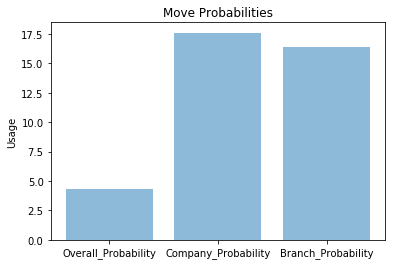

In [50]:
prob_moved = data_df[data_df.has_relocated_next_year==True].shape[0]/ data_df.shape[0]

x_labels = ("Overall_Probability", "Company_Probability", "Branch_Probability")
y_pos = np.arange(len(x_labels))
all_probabilities = [prob_moved, prob_company_moved, prob_branch_moved]

all_probabilities = [i * 100 for i in all_probabilities]
 
plt.bar(y_pos, all_probabilities, align='center', alpha=0.5)
plt.xticks(y_pos, x_labels)
plt.ylabel('Usage')
plt.title('Move Probabilities')
 
plt.show()

<a id='bottom'></a>

<a href=#top>Top</a>

# End